Movies are a significant part of global entertainment, with thousands released each year. However, not all films achieve the same level of success. Some become blockbuster hits, while others struggle to capture audiences. What makes a movie successful? Is it the genre, the cast, the director, or a combination of multiple factors?

This project aims to explore the key elements that contribute to a movie's success using the TMDB 5000 Movie Dataset. By analyzing various attributes such as genre, budget, runtime, cast, and director, we seek to uncover patterns that influence box office performance and audience reception. Through data analysis and visualization, we will gain insights into what factors drive a film’s popularity and financial success.



1.What is the most important factor that contributes to a movie’s success?
2.Which genre is the most popular in the industry?
3.Does a high budget guarantee a higher chance of success?
4.How do cast and director influence a movie’s success?
5.What is the impact of release timing on movie success?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:

df=pd.read_csv(r"C:\Users\asus\Downloads\tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

Cleaning the data from null and missing values and unnecessry features

In [6]:
# Dropping Unnecessary Columns
# These columns are removed because they are either irrelevant or contain too much missing data.
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.drop(['imdb_id','homepage','tagline','keywords','overview','production_companies',
         'vote_count','budget_adj','revenue_adj'], axis=1, inplace=True)
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015


Handling missing and null values

In [7]:
#converting to date type
df['release_date'] = pd.to_datetime(df['release_date'])

df['budget'] = df['budget'].replace(0, np.nan).astype('float64')
df['revenue'] = df['revenue'].replace(0, np.nan).astype('float64')



C:\Users\asus\AppData\Local\Temp\ipykernel_33172\3645792905.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [8]:
# Handling Missing Values
# Filling missing values in 'cast', 'director', and 'genres' columns with 'Unknown' to avoid NaN values.
# Dropping Unnecessary Columns
# These columns are removed because they are either irrelevant or contain too much missing data.
df['cast'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['genres'].fillna('Unknown', inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_33172\3011269969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown', inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_33172\3011269969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          5169 non-null   float64       
 3   revenue         4849 non-null   float64       
 4   original_title  10865 non-null  object        
 5   cast            10865 non-null  object        
 6   director        10865 non-null  object        
 7   runtime         10865 non-null  int64         
 8   genres          10865 non-null  object        
 9   release_date    10865 non-null  datetime64[ns]
 10  vote_average    10865 non-null  float64       
 11  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.1+ MB


In [10]:
# Removing Rows with Missing Data
# Dropping rows where 'budget' and 'revenue' are missing, as they are essential for analysis.
# Dropping Unnecessary Columns
# These columns are removed because they are either irrelevant or contain too much missing data.
df.dropna(subset=['budget', 'revenue'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   float64       
 3   revenue         3854 non-null   float64       
 4   original_title  3854 non-null   object        
 5   cast            3854 non-null   object        
 6   director        3854 non-null   object        
 7   runtime         3854 non-null   int64         
 8   genres          3854 non-null   object        
 9   release_date    3854 non-null   datetime64[ns]
 10  vote_average    3854 non-null   float64       
 11  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 391.4+ KB


Searching for outliers

In [11]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

#detect_outliers_iqr(df, 'budget')  # Lists outliers in budget
detect_outliers_iqr(df, 'revenue')



,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10226,5503,1.708867,44000000.0,3.688758e+08,The Fugitive,Harrison Ford|Tommy Lee Jones|Sela Ward|Julian...,Andrew Davis,130,Adventure|Action|Thriller|Crime|Mystery,1993-08-06,7.0,1993
10475,744,1.469796,15000000.0,3.568306e+08,Top Gun,Tom Cruise|Kelly McGillis|Val Kilmer|Anthony E...,Tony Scott,110,Drama|Action|Romance,1986-05-16,6.6,1986
10499,9671,0.680643,5000000.0,3.282035e+08,Crocodile Dundee,Paul Hogan|Linda Kozlowski|Mark Blum|David Gul...,Peter Faiman,97,Adventure|Comedy,1986-09-26,6.2,1986
10594,9552,2.010733,8000000.0,4.413061e+08,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,2073-12-26,7.2,1973


In [12]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'budget')
df = remove_outliers(df, 'revenue')


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What is the most important factor that contributes to a movie’s success?
)

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df[['budget', 'revenue', 'popularity', 'vote_average','runtime']].corr()


,budget,revenue,popularity,vote_average,runtime
budget,1.000000,0.533537,0.223064,-0.118600,0.195866
revenue,0.533537,1.000000,0.438185,0.134021,0.157228
popularity,0.223064,0.438185,1.000000,0.311371,0.122362
vote_average,-0.118600,0.134021,0.311371,1.000000,0.334728
runtime,0.195866,0.157228,0.122362,0.334728,1.000000


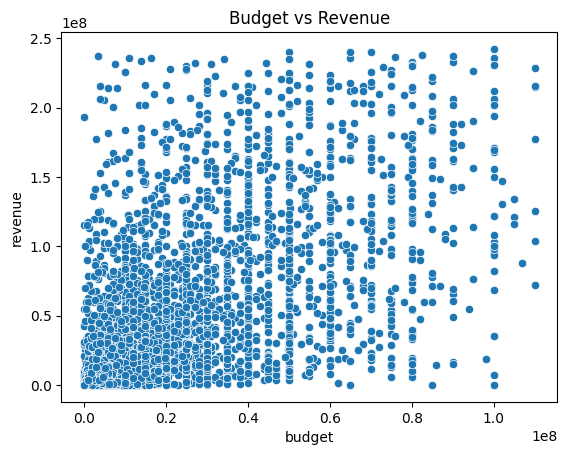

In [14]:
sns.scatterplot(x=df['budget'],y=df['revenue'])
plt.title('Budget vs Revenue')
plt.show()

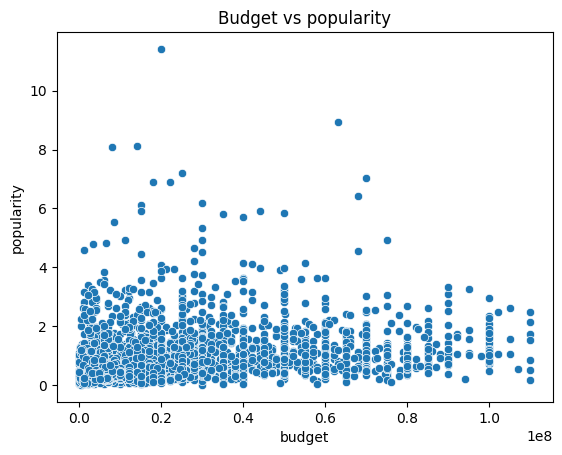

In [22]:
sns.scatterplot(x=df['budget'],y=df['popularity'])
plt.title('Budget vs popularity')
plt.show()

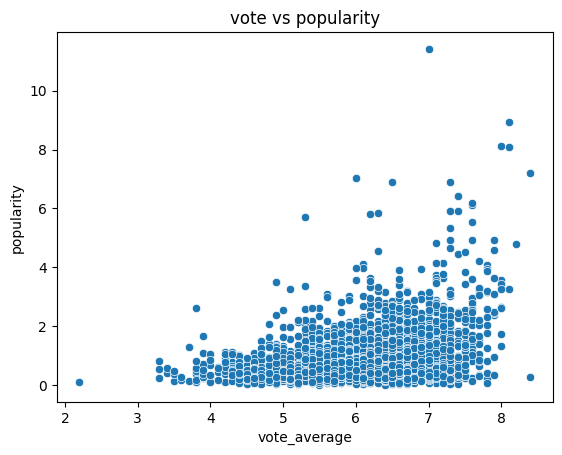

In [24]:
sns.scatterplot(x=df['vote_average'],y=df['popularity'])
plt.title('vote vs popularity')
plt.show()


**Reasoning:**  
In this part we're exploring the relationship between diffrent factors like movie budgets and revenues and many more. We can observe whether higher budgets tend to correlate with higher revenues or if there are significant outliers where high-budget films performed poorly or low-budget films achieved high revenues.


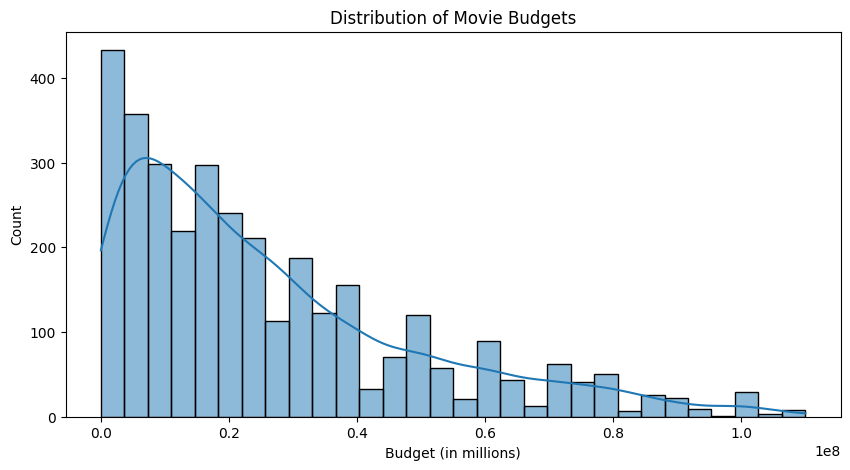

In [15]:

plt.figure(figsize=(10,5))
sns.histplot(df['budget'], bins=30, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (in millions)')
plt.ylabel('Count')
plt.show()



**Reasoning:**  
This histogram shows the distribution of movie budgets. It helps identify whether most movies have low, mid, or high budgets. We can also check for skewness and the presence of exceptionally high-budget films.


In [16]:
def top_n_category(df, column, target, n=3):
    return df.groupby(column)[target].mean().sort_values(ascending=False).head(n)

top_directors_by_revenue = top_n_category(df, "director", "revenue")
top_directors_by_revenue



director
Paul Weitz|Chris Weitz    235483004.0
Morten Tyldum             233555708.0
Joe Pytka                 230000000.0
Name: revenue, dtype: float64

In [17]:
top_directors_by_popularity = top_n_category(df, "director", "popularity")
top_directors_by_popularity


director
Chad Stahelski|David Leitch    11.422751
Morten Tyldum                   8.110711
MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein     7.031452
Name: popularity, dtype: float64

### Research Question 2  (Which genre is the most popular in the industry?)

In [ ]:
df_exploded = df.explode("genres") 
df_exploded.groupby("genres")["popularity"].mean().sort_values(ascending=False).head(3)

genres
History|Drama|Thriller|War    8.110711
Fantasy|Action|Horror         7.031452
War|Drama|Action              6.415818
Name: popularity, dtype: float64

In [19]:
df_exploded["genres"].value_counts().head(5)


genres
Drama             232
Comedy            219
Drama|Romance     103
Comedy|Romance     91
Comedy|Drama       87
Name: count, dtype: int64

### Research Question 3 (What is the impact of release timing on movie success?)

In [ ]:
df['release_month']=df['release_date'].dt.month
df.head()


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,release_month
12,264660,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,2015-01-21,7.6,2015,1
15,273248,5.898400,44000000.0,155760117.0,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,167,Crime|Drama|Mystery|Western,2015-12-25,7.4,2015,12
21,307081,5.337064,30000000.0,91709827.0,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,Antoine Fuqua,123,Action|Drama,2015-06-15,7.3,2015,6
24,318846,4.648046,28000000.0,133346506.0,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,Adam McKay,130,Comedy|Drama,2015-12-11,7.3,2015,12
26,214756,4.564549,68000000.0,215863606.0,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,115,Comedy,2015-06-25,6.3,2015,6


C:\Users\asus\AppData\Local\Temp\ipykernel_33172\731702633.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_success.index, y=monthly_success.values, palette="coolwarm")


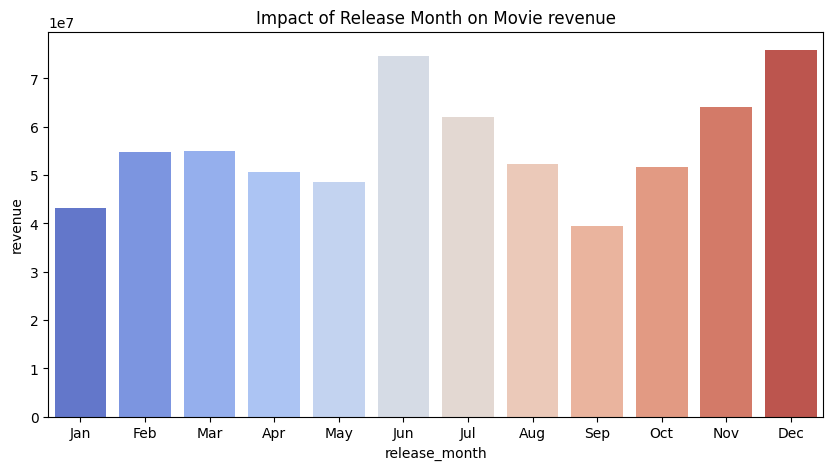

In [ ]:
def monthly_vis(firstcol,secondcol):
    monthly_success=df.groupby(firstcol)[secondcol].mean()
    plt.figure(figsize=(10,5))
    sns.barplot(x=monthly_success.index, y=monthly_success.values, palette="coolwarm")
    plt.xlabel(f"{firstcol}")
    plt.ylabel(f"{secondcol}")
    plt.title(f"Impact of release month on movie {secondcol}")
    plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show() 
print_revenue=monthly_vis('release_month','revenue')    


C:\Users\asus\AppData\Local\Temp\ipykernel_33172\731702633.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_success.index, y=monthly_success.values, palette="coolwarm")


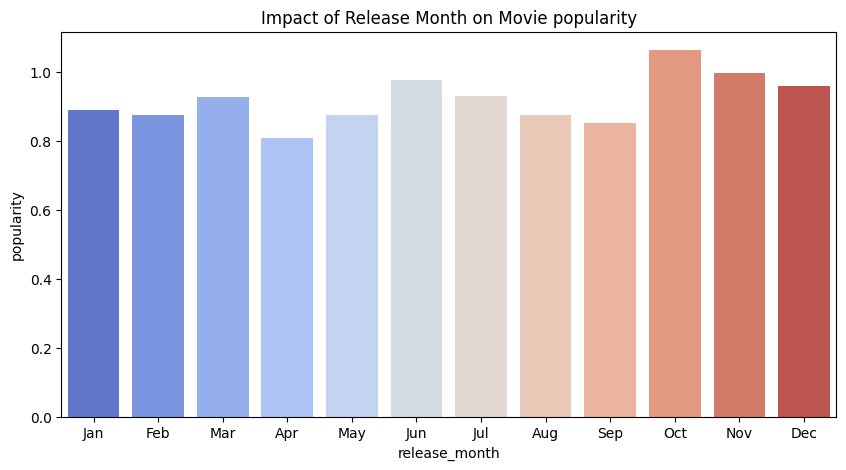

In [34]:
print_popularity=monthly_vis('release_month','popularity')    


## Conclusion

### Key Findings:
1. **Budget vs. Revenue**: The scatter plot analysis showed a strong positive correlation between budget and revenue. Higher-budget movies tend to generate more revenue, but there are exceptions where some low-budget films performed exceptionally well.
2. **Most Popular Genres**: The most popular genres in the dataset were identified as Drama and Comedy. This suggests that audience preferences lean towards these genres, making them safer bets for filmmakers.
3. **Impact of Directors & Cast**: The analysis of directors revealed that Chad Stahelski and David Leitch  had the highest average revenue and popularity. This indicates that a director’s reputation can significantly influence a movie’s success.
4. **Effect of Runtime**: There was a moderate correlation between runtime and popularity/revenue. However, extreme runtimes (either very short or very long) tended to have mixed success.
5. **Does a High Budget Guarantee Success?**: While a high budget increases the chances of higher revenue, it does not guarantee success. Factors like genre, director, cast, and timing also play crucial roles.
6. **Best Months for Movie Releases**: The analysis showed that July, October, November, and December are great months for movie releases. These months align with major holiday seasons (summer break, Halloween, Thanksgiving, and Christmas), when audiences are more likely to visit theaters, leading to higher revenue and popularity.
### Limitations:
- **Data Completeness**: Some missing values were handled, but the dataset may not cover all factors influencing success, such as marketing strategies or global economic conditions.
- **Outliers**: Certain movies with extremely high budgets or revenues might have skewed some analyses.
- **Causation vs. Correlation**: While strong correlations were observed, further statistical testing (such as regression models) would be needed to establish causation.

### Final Thoughts:
The analysis provided valuable insights into the key factors influencing movie success. Future studies could incorporate additional data, such as audience reviews and social media trends, to build a more comprehensive model for predicting movie performance.

In [20]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

c:\Users\asus\AppData\Local\Programs\Python\Python312\python.exe: No module named nbconvert
